In [1]:
import numpy as np
import torch

import matplotlib.pyplot as plt

In [36]:
dtype = torch.float32

In [119]:
c = np.array([1, 2])
c_torch = torch.tensor(c, dtype=dtype)
particles = torch.tensor(np.zeros((10, 2)) + 0.5, dtype=dtype, requires_grad=True)

In [120]:
cost = lambda x, w: w * (x @ c_torch) - (torch.log(x) + torch.log(1 - x)).sum(axis=-1)

In [135]:
def project_vectors(v, K, e=1e-6):
    norm = torch.linalg.norm(v, axis=1) + e
    C = torch.min(norm, K * torch.ones_like(norm))
    
    return C[:, None] * v / norm[:, None]

In [158]:
w = 100
num_iters = 1000
lr = 0.001
history = torch.zeros((num_iters, 10, 2), dtype=dtype)

for i in range(num_iters):
    val = cost(particles, w)
    val.sum().backward()
    
    with torch.no_grad():
        scaled_grad = project_vectors(particles.grad, 100)
        particles += -lr * scaled_grad + 0.1 * np.sqrt(2 * lr) * torch.randn_like(particles)
        torch.clip(particles, min=1e-6, max=1-1e-6, out=particles)
        history[i] = particles.detach().clone()
    particles.grad.zero_()

history = history.transpose(1, 0)

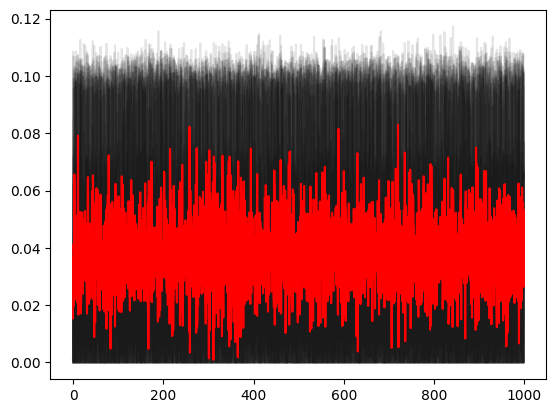

In [159]:
for i in range(len(history)):
    plt.plot(history[i], color='black', alpha=0.1)

plt.plot(history.mean(axis=0), color='red');

In [162]:
valid_samples = torch.rand(10) < 0

In [165]:
~valid_samples.any()

tensor(True)

In [166]:
np.random.choice(np.arange(len(valid_samples)), size=None, replace=replace, p=w)

In [167]:
np.random.choice?

In [168]:
a = torch.tensor(10)

In [169]:
a.item()

10